<a href="https://colab.research.google.com/github/cao035/Project/blob/main/Cherry_Odhiambo_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision


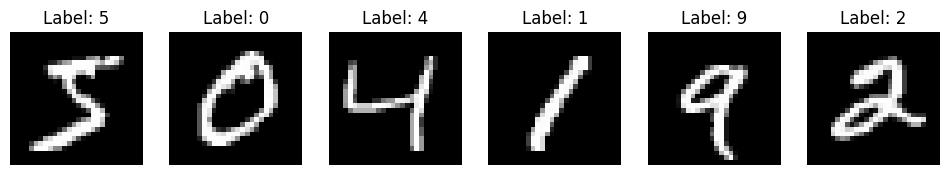

Train Epoch: 1 [0/60000]	Loss: 2.298097
Train Epoch: 1 [6400/60000]	Loss: 2.285118
Train Epoch: 1 [12800/60000]	Loss: 2.094563
Train Epoch: 1 [19200/60000]	Loss: 1.464452
Train Epoch: 1 [25600/60000]	Loss: 0.983943
Train Epoch: 1 [32000/60000]	Loss: 0.996361
Train Epoch: 1 [38400/60000]	Loss: 0.621002
Train Epoch: 1 [44800/60000]	Loss: 0.559411
Train Epoch: 1 [51200/60000]	Loss: 0.564926
Train Epoch: 1 [57600/60000]	Loss: 0.802100

Test set: Average loss: 0.0052, Accuracy: 9063/10000 (91%)

Train Epoch: 2 [0/60000]	Loss: 0.489717
Train Epoch: 2 [6400/60000]	Loss: 0.735961
Train Epoch: 2 [12800/60000]	Loss: 0.626476
Train Epoch: 2 [19200/60000]	Loss: 0.497532
Train Epoch: 2 [25600/60000]	Loss: 0.328532
Train Epoch: 2 [32000/60000]	Loss: 0.461432
Train Epoch: 2 [38400/60000]	Loss: 0.437617
Train Epoch: 2 [44800/60000]	Loss: 0.383673
Train Epoch: 2 [51200/60000]	Loss: 0.424884
Train Epoch: 2 [57600/60000]	Loss: 0.393210

Test set: Average loss: 0.0033, Accuracy: 9348/10000 (93%)

Train Ep

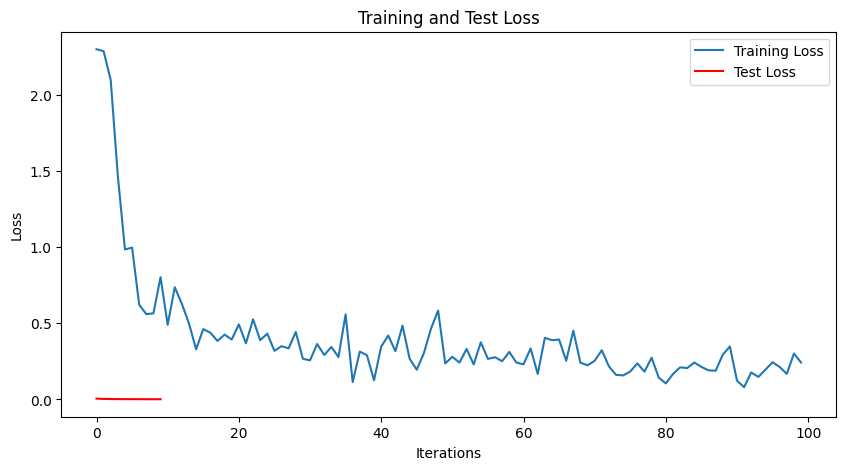

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


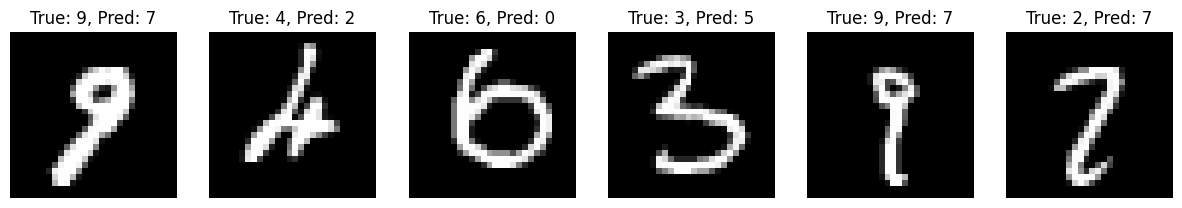

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Task 2: Prepare and Explore the MNIST Dataset
# Load MNIST datasets for training and testing
train_dataset = datasets.MNIST(root="./mnist_data/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="./mnist_data/", train=False, transform=transforms.ToTensor())

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some images
fig, ax = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    image, label = train_dataset[i]
    ax[i].imshow(image.squeeze().numpy(), cmap='gray')
    ax[i].set_title(f"Label: {label}")
    ax[i].axis('off')
plt.show()

# Task 3: Design and Build a Deep Learning Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)  # Flatten for the fully connected layer
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model, define the optimizer and loss function
model = CNNModel()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Task 4: Train and Monitor the Model
n_epochs = 10
train_losses = []
test_losses = []

# Training function
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item():.6f}")
            train_losses.append(loss.item())

# Testing function
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')

for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

# Plotting training and testing losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss", color="red")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.show()

# Task 5: Evaluate and Analyze the Model Performance
# Evaluate the model on the test dataset
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True).squeeze()
        all_preds.extend(pred.numpy())
        all_labels.extend(target.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize some misclassified examples
misclassified_idx = [i for i in range(len(all_preds)) if all_preds[i] != all_labels[i]]
fig, ax = plt.subplots(1, 6, figsize=(15, 4))
for i, idx in enumerate(misclassified_idx[:6]):
    image, label = test_dataset[idx]
    ax[i].imshow(image.squeeze(), cmap='gray')
    ax[i].set_title(f"True: {label}, Pred: {all_preds[idx]}")
    ax[i].axis('off')
plt.show()
